# Exploración de archivos

In [1]:
from utils.cargar import df_caso

In [2]:
caso = 'alicia'
df = df_caso(caso)
df.head()

,user_id,team_id,gender,df,title,opt_left,opt_right,max_num,sel,comment,phase,time,curso
id,,,,,,,,,,,,,
20310,2870,NaN,M,2,[Proporcione argumentos para justificar su res...,Los criterios técnicos del proyecto y de los u...,Los plazos acordados del proyecto,6,1,entrega de producto defectuoso no cumple con l...,1,2021-10-27T01:26:34.475Z,2021.CD1201
20311,2870,NaN,M,1,[Proporcione argumentos para justificar su res...,Por sobre cualquier otra consideración,Supeditado a las condiciones contextuales,6,1,se debe recuperar tiempo perdido,1,2021-10-27T01:26:35.637Z,2021.CD1201
20314,3339,NaN,M,1,[Proporcione argumentos para justificar su res...,Por sobre cualquier otra consideración,Supeditado a las condiciones contextuales,6,3,"Una contexto como es el de pandemia, es algo m...",1,2021-10-27T03:07:50.378Z,2021.CD1201
20315,3339,NaN,M,2,[Proporcione argumentos para justificar su res...,Los criterios técnicos del proyecto y de los u...,Los plazos acordados del proyecto,6,3,Debiese priorizar cumplir con los criterios té...,1,2021-10-27T03:07:52.002Z,2021.CD1201
20400,2695,NaN,F,1,[Proporcione argumentos para justificar su res...,Por sobre cualquier otra consideración,Supeditado a las condiciones contextuales,6,4,Lo mejor sería intentar apurar un poco el proy...,1,2021-10-28T15:39:02.170Z,2021.CD1201


In [3]:
print(df['title'].unique()[0])
print('1\t'+df['opt_left'].unique()[0])
print(str(df['max_num'].unique()[0])+'\t'+df['opt_right'].unique()[0])

[Proporcione argumentos para justificar su respuesta] Continuando la pregunta anterior, Alicia se encuentra ante otro dilema como profesional. Ella podría priorizar entregar el proyecto a tiempo, pero debería realizar modificaciones que podrían no satisfacer del todo los requerimientos técnicos del proyecto y de los usuarios finales, aunque sea técnicamente funcional. Por otro lado, podría priorizar terminarlo con todas sus especificaciones y entregarlo con demora, aunque eso conlleva posibles sanciones contractuales. Por lo tanto, Alicia debería priorizar :
1	Los criterios técnicos del proyecto y de los usuarios
6	Los plazos acordados del proyecto


In [4]:
print('Cantidad de valores nulos por columna:')
display(df.isna().sum())
print('\nCantidad de valores únicos por columna:')
display(df.nunique())

Cantidad de valores nulos por columna:


user_id         0
team_id      9588
gender          0
df              0
title           0
opt_left        0
opt_right       0
max_num         0
sel             0
comment        80
phase           0
time            0
curso           0
dtype: int64


Cantidad de valores únicos por columna:


user_id       1628
team_id        549
gender           3
df               2
title           32
opt_left         6
opt_right        6
max_num          2
sel              7
comment      11788
phase            8
time         12397
curso            2
dtype: int64

In [5]:
df = df[df['comment'].notna()]
print("Cantidad de respuestas con texto: {}".format(len(df)))

Cantidad de respuestas con texto: 12317


## Exploración básica del texto

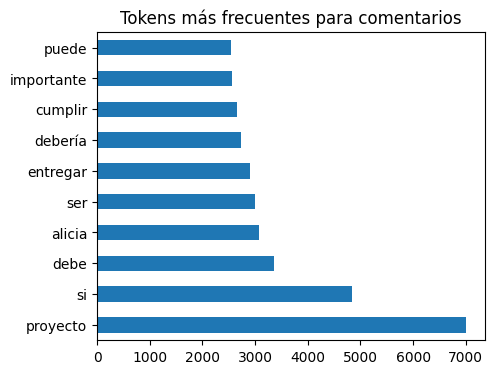

In [6]:
from utils.exploracion import plot_token_frequency, most_common
from nltk.corpus import stopwords

serie_tokens = most_common(df,'comment',ignore=stopwords.words('spanish'))
plot_token_frequency(serie_tokens,'Tokens más frecuentes para comentarios')

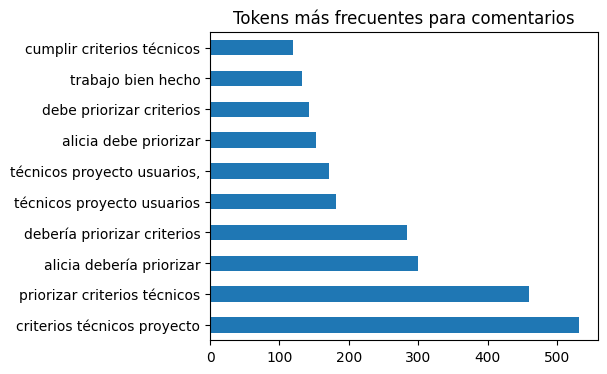

In [7]:
serie_tokens3 = most_common(df,'comment',ignore=stopwords.words('spanish'),n_grams=3)
plot_token_frequency(serie_tokens3,'Tokens más frecuentes para comentarios')

---

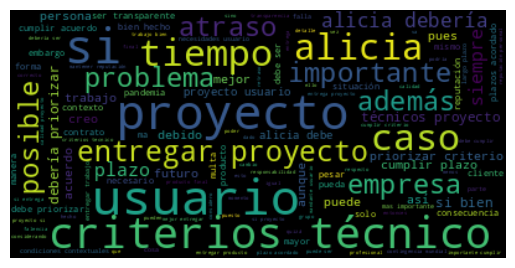

In [8]:
from utils.exploracion import wordcloud_from_column

wordcloud_from_column(df,'comment',ignore=stopwords.words('spanish'))

## Análisis exploratorio

---

In [9]:
from utils.preprocesamiento import delete_non_string_rows

df = delete_non_string_rows(df,'comment')

0 rows found with non string elements for column comment


In [10]:
from utils.exploracion import comment_length

lengths = comment_length(df,'comment')
lengths_nsw = comment_length(df,'comment',ignore=stopwords.words('spanish'))

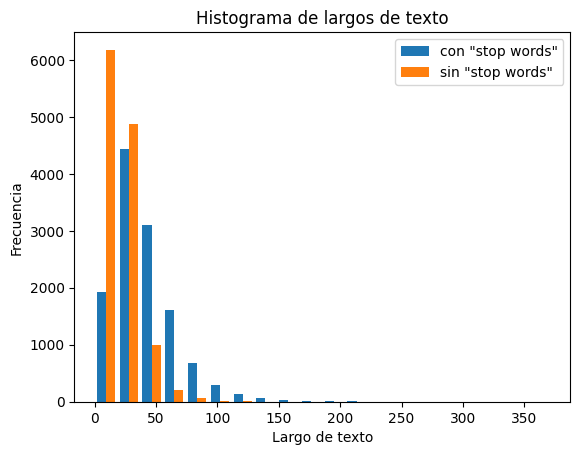

In [11]:
import matplotlib.pyplot as plt

plt.hist([lengths, lengths_nsw], bins=20, color=['tab:blue', 'tab:orange'], label=['con "stop words"', 'sin "stop words"'])

plt.xlabel('Largo de texto')
plt.ylabel('Frecuencia')
plt.title('Histograma de largos de texto')
plt.legend()
plt.show()

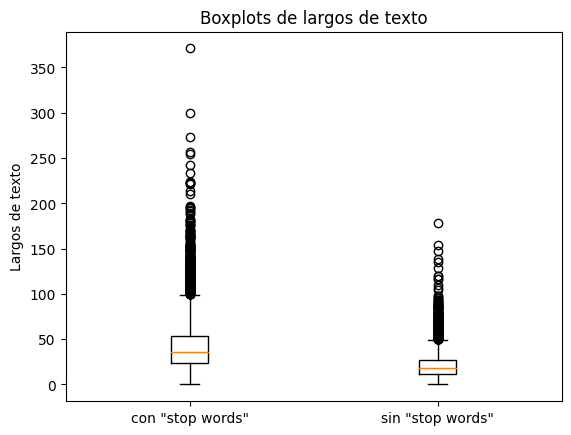

In [12]:
fig, ax = plt.subplots()
ax.boxplot([lengths, lengths_nsw])
ax.set_ylabel('Largos de texto')
ax.set_xticklabels(['con "stop words"', 'sin "stop words"'])
ax.set_title('Boxplots de largos de texto')
plt.show()

In [13]:
from utils.exploracion import basic_stats, print_basic_stats

In [14]:
print('Con "stop words"')
print_basic_stats(lengths)
print('\nSin "stop words"')
print_basic_stats(lengths_nsw)

Con "stop words"
Media: 41.879922058942924
Desviación estándar: 26.495447156811505
Mediana: 36.0
Mínimo: 1
Máximo: 371

Sin "stop words"
Media: 21.24575789559146
Desviación estándar: 13.353996673413217
Mediana: 18.0
Mínimo: 0
Máximo: 178


---

Condicionamiento por valor seleccionado

In [15]:
df['sel'].value_counts()

2    4226
1    2470
3    2173
4    1373
5    1354
6     602
7     119
Name: sel, dtype: int64

Se observan valores fuera de rango, por el momento se eliminarán estos valores

In [16]:
df = df.drop(df[df['sel'] > 6].index)

In [17]:
toks_1 = most_common(df[df['sel'] == 1],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_2 = most_common(df[df['sel'] == 2],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_3 = most_common(df[df['sel'] == 3],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_4 = most_common(df[df['sel'] == 4],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_5 = most_common(df[df['sel'] == 5],'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_6 = most_common(df[df['sel'] == 6],'comment',ignore=stopwords.words('spanish')+['si', caso])

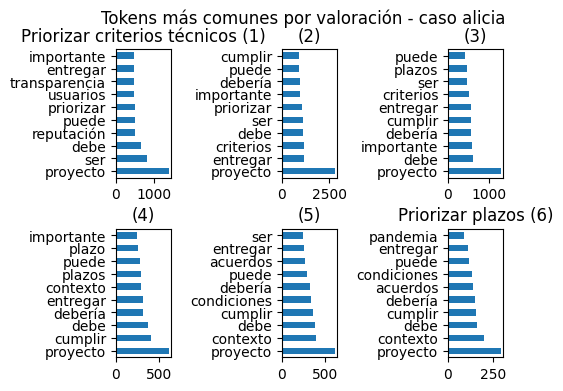

In [18]:
fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(wspace=2, hspace=0.4)

plot_token_frequency(toks_1,'Priorizar criterios técnicos (1)',ax=axs[0,0])
plot_token_frequency(toks_2,'(2)',ax=axs[0,1])
plot_token_frequency(toks_3,'(3)',ax=axs[0,2])
plot_token_frequency(toks_4,'(4)',ax=axs[1,0])
plot_token_frequency(toks_5,'(5)',ax=axs[1,1])
plot_token_frequency(toks_6,'Priorizar plazos (6)',ax=axs[1,2])
fig.suptitle("Tokens más comunes por valoración - caso {}".format(caso));

In [19]:
lengths_1 = comment_length(df[df['sel'] == 1],'comment',ignore=stopwords.words('spanish'))
lengths_2 = comment_length(df[df['sel'] == 2],'comment',ignore=stopwords.words('spanish'))
lengths_3 = comment_length(df[df['sel'] == 3],'comment',ignore=stopwords.words('spanish'))
lengths_4 = comment_length(df[df['sel'] == 4],'comment',ignore=stopwords.words('spanish'))
lengths_5 = comment_length(df[df['sel'] == 5],'comment',ignore=stopwords.words('spanish'))
lengths_6 = comment_length(df[df['sel'] == 6],'comment',ignore=stopwords.words('spanish'))

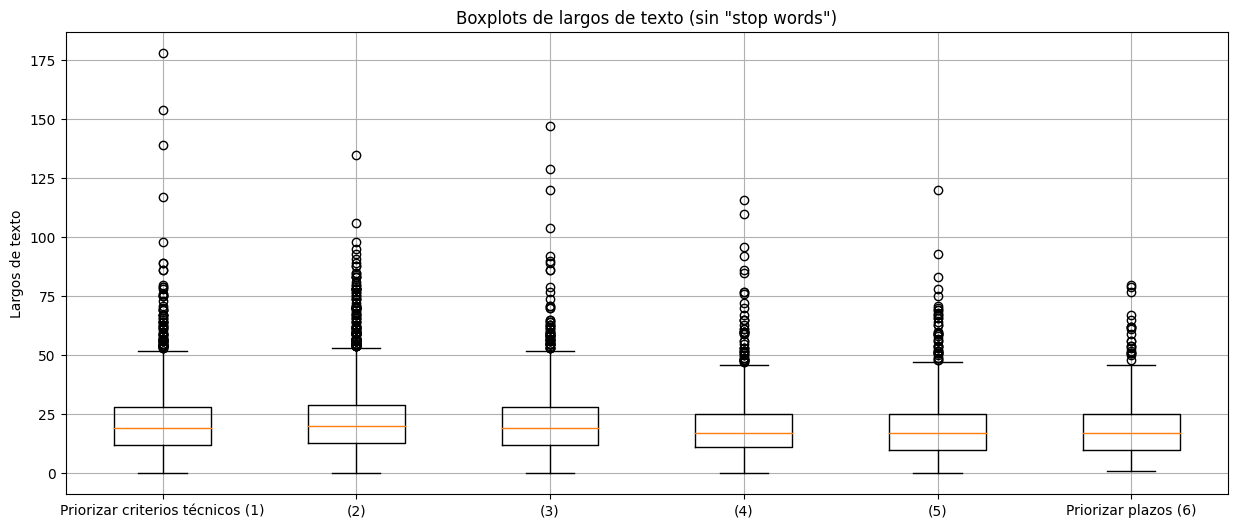

In [20]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
ax.boxplot([lengths_1, lengths_2, lengths_3, lengths_4, lengths_5, lengths_6])
ax.set_ylabel('Largos de texto')
ax.set_xticklabels(['Priorizar criterios técnicos (1)', '(2)', '(3)', '(4)', '(5)', 'Priorizar plazos (6)'])
ax.set_title('Boxplots de largos de texto (sin "stop words")')
plt.grid()
plt.show()

In [21]:
from utils.exploracion import print_table_md

dic = basic_stats(lengths_1)

# headers = ['valoración'] + list(dic.keys())
headers = ['valoración', 'media', 'mediana', 'desviación estándar', 'mínimo', 'máximo']
data = [['(1)'] + list(dic.values())]
data.append(['(2)'] + list(basic_stats(lengths_2).values()))
data.append(['(3)'] + list(basic_stats(lengths_3).values()))
data.append(['(4)'] + list(basic_stats(lengths_4).values()))
data.append(['(5)'] + list(basic_stats(lengths_5).values()))
data.append(['(6)'] + list(basic_stats(lengths_6).values()))

print_table_md(headers, data)

| valoración | media | mediana | desviación estándar | mínimo | máximo |
| --- | --- | --- | --- | --- | --- |
| (1) | 21.546558704453442 | 19.0 | 14.18024722049683 | 0 | 178 |
| (2) | 22.522953147184097 | 20.0 | 13.310823069114296 | 0 | 135 |
| (3) | 21.481362172112288 | 19.0 | 13.3358765340152 | 0 | 147 |
| (4) | 19.599417334304444 | 17.0 | 12.75963225358819 | 0 | 116 |
| (5) | 19.27695716395864 | 17.0 | 12.480150889360589 | 0 | 120 |
| (6) | 19.38205980066445 | 17.0 | 12.569416968710241 | 1 | 80 |


---

### Condicionamiento por fases

In [22]:
df['phase'].value_counts()

1    4918
3    2161
2    1899
4    1314
5     982
6     598
7     272
8      54
Name: phase, dtype: int64

In [23]:
from utils.cargar import fase

df_ind1 = fase(df,'Ind1',caso)

df_ind1['phase'].value_counts()

1    2832
2    1899
Name: phase, dtype: int64

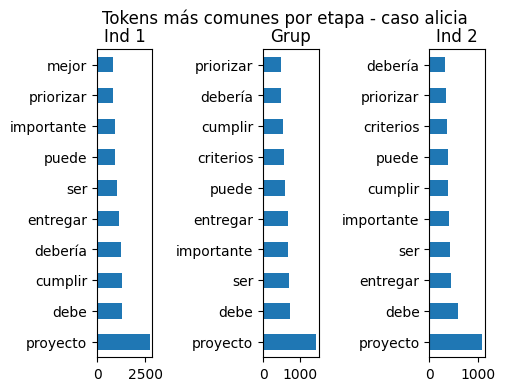

In [25]:
toks_ind1 = most_common(fase(df,'Ind1',caso),'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_grup = most_common(fase(df,'Grup',caso),'comment',ignore=stopwords.words('spanish')+['si', caso])
toks_ind2 = most_common(fase(df,'Ind2',caso),'comment',ignore=stopwords.words('spanish')+['si', caso])

fig, axs = plt.subplots(1, 3)
plt.subplots_adjust(wspace=2, hspace=0.4)

plot_token_frequency(toks_ind1,'Ind 1',ax=axs[0])
plot_token_frequency(toks_grup,'Grup',ax=axs[1])
plot_token_frequency(toks_ind2,'Ind 2',ax=axs[2])
fig.suptitle("Tokens más comunes por etapa - caso {}".format(caso));

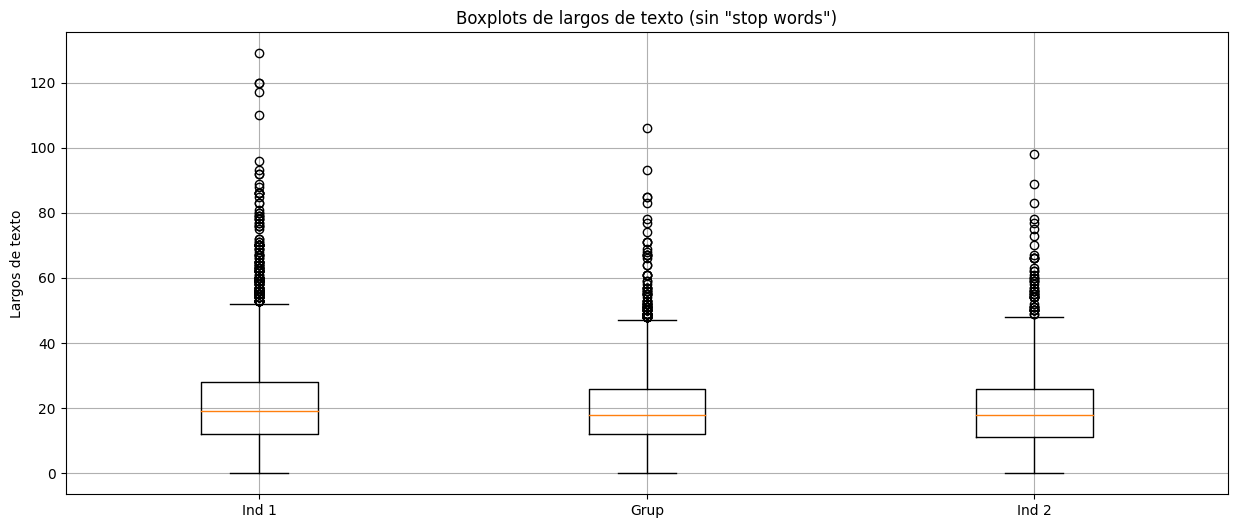

In [27]:
lengths_ind1 = comment_length(fase(df,'Ind1',caso),'comment',ignore=stopwords.words('spanish'))
lengths_grup = comment_length(fase(df,'Grup',caso),'comment',ignore=stopwords.words('spanish'))
lengths_ind2 = comment_length(fase(df,'Ind2',caso),'comment',ignore=stopwords.words('spanish'))

plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
ax.boxplot([lengths_ind1, lengths_grup, lengths_ind2])
ax.set_ylabel('Largos de texto')
ax.set_xticklabels(['Ind 1', 'Grup', 'Ind 2'])
ax.set_title('Boxplots de largos de texto (sin "stop words")')
plt.grid()
plt.show()

In [28]:
dic = basic_stats(lengths_ind1)

headers = ['valoración', 'media', 'mediana', 'desviación estándar', 'mínimo', 'máximo']
data = [['Ind 1'] + list(dic.values())]
data.append(['Grup'] + list(basic_stats(lengths_grup).values()))
data.append(['Ind 2'] + list(basic_stats(lengths_ind2).values()))

print_table_md(headers, data)

| valoración | media | mediana | desviación estándar | mínimo | máximo |
| --- | --- | --- | --- | --- | --- |
| Ind 1 | 21.606425702811244 | 19.0 | 13.670018545339929 | 0 | 129 |
| Grup | 20.44284168770285 | 18.0 | 11.772641679127124 | 0 | 106 |
| Ind 2 | 19.886666666666667 | 18.0 | 12.182584318762611 | 0 | 98 |
